In [1]:
from aux_functions import *

### (Opcional) Extracción de frames

In [2]:
video_path = "/Users/diegosilveracoeff/Downloads/Video_Rami.mp4"
frame_nums = [32, 33]  # Números de frames que deseas extraer
output_folder = "/Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain"

extract_frames(video_path, frame_nums, output_folder)

Frame 32 guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/frame_32.png
Frame 33 guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/frame_33.png


### Defino rutas de trabajo y cargo imágenes

En las siguientes celdas se importan la imagen de referencia y la imagen objetivo

Valor mínimo de diferencia:  -255
Valor máximo de diferencia:  255
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/residual_image.tif


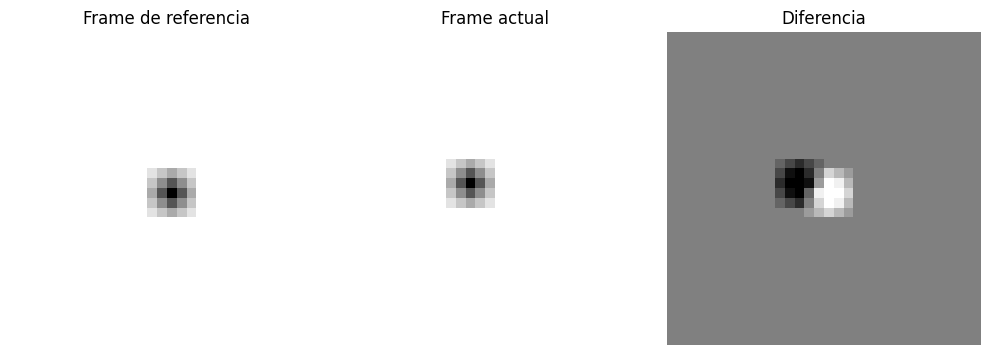

In [2]:
folder_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian'

reference_frame_path = os.path.join(folder_path, 'DCM_reference_image.tif')
current_frame_path = os.path.join(folder_path, 'DCM_7x3_image.tif')
residual_1_path = os.path.join(folder_path, 'residual_image.tif')

tittles = ['Frame de referencia','Frame actual','Diferencia']

subtract_frames(current_frame_path, reference_frame_path, residual_1_path, clip=True)

plot_three_images(reference_frame_path, current_frame_path, residual_1_path, tittles)

(32, 32, 2)
flow_x guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/flow_x.npy
flow_y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/flow_y.npy
Visualización del flujo óptico guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/optical_flow_visualization.png


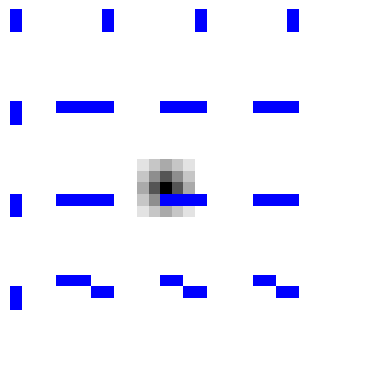

In [3]:
optical_flow(current_frame_path, reference_frame_path, folder_path)

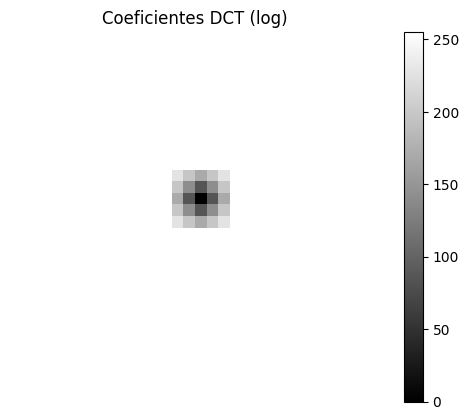

In [5]:
#Celda para arreglar la motion compensation

flow_x_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/flow_x.npy'
flow_y_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/flow_y.npy'

reference_frame_path = os.path.join(folder_path, 'DCM_reference_image.tif')
current_frame_path = os.path.join(folder_path, 'DCM_7x3_image.tif')

curr_frame = cv2.imread(current_frame_path)
ref_frame = cv2.imread(reference_frame_path)


# Convertir las imágenes a escala de grises
curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)
ref_gray = cv2.cvtColor(ref_frame, cv2.COLOR_BGR2GRAY)

# Cargar los archivos flow_x.npy y flow_y.npy
flow_x = np.load(flow_x_path)
flow_y = np.load(flow_y_path)

    # Aplicar el flujo óptico al segundo frame
corrected_reference = np.zeros_like(curr_gray)
# corrected_frame = curr_gray
for i in range(corrected_reference.shape[0]):
    for j in range(corrected_reference.shape[1]):
        corrected_reference[i][j] = ref_gray[i - int(flow_x[i][j])][j - int(flow_y[i][j])]
# print(flow_x.shape)
# print(flow_x)
# print(flow_y.shape)
# print(flow_y)

output_path = os.path.join('corrected_reference.tif')
cv2.imwrite(output_path, corrected_reference)

plt.imshow(corrected_reference, cmap='gray', vmin=0, vmax=np.max(corrected_reference))
plt.colorbar()
plt.title('Coeficientes DCT (log)')
plt.axis('off')  # Ocultar ejes
plt.show()

In [26]:
flow_x_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/flow_x.npy'
flow_y_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/flow_y.npy'
output_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/motion_corrected_frame_npwhere_reference_based.tif'

encoder_motion_correction(current_frame_path, reference_frame_path, flow_x_path, flow_y_path, output_path)

Current frame con motion correction guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/motion_corrected_frame_npwhere_reference_based.tif


In [27]:
corrected_current_frame = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/motion_corrected_frame_npwhere_reference_based.tif'
output_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/motion_corrected_difference.tif'
subtract_frames(corrected_current_frame, reference_frame_path, output_path, clip=True)

Valor mínimo de diferencia:  -255
Valor máximo de diferencia:  0
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/motion_corrected_difference.tif


In [28]:
diff_original = cv2.imread('/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/residual_image.tif')
diff_corrected = cv2.imread('/Users/diegosilveracoeff/Desktop/Fing/DCM/White_Background_Synthetic_Gaussian/motion_corrected_difference.tif')

energy_diff_original = np.sum(np.abs(diff_original-128))
energy_diff_corrected = np.sum(np.abs(diff_corrected-128))

print(energy_diff_original)
print(energy_diff_corrected)

15348
57600


In [2]:
# Pruebo la codificación con la imagen de referencia 
reference_frame_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/DCM_reference_image.png'
counted_pixels = count_pixel_values(reference_frame_path)
print(counted_pixels)
symbols, codes = huffman_codebook(counted_pixels)
print(symbols, codes)
write_encoded_file(reference_frame_path, symbols, codes, '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/Encoded_reference_image.bin')

(32, 32)
[('0', 999), ('28', 4), ('57', 8), ('85', 4), ('113', 4), ('170', 4), ('255', 1)]
Símbolo: 0, Código Huffman: 1
Símbolo: 28, Código Huffman: 0101
Símbolo: 57, Código Huffman: 011
Símbolo: 85, Código Huffman: 000
Símbolo: 113, Código Huffman: 0100
Símbolo: 170, Código Huffman: 0011
Símbolo: 255, Código Huffman: 0010
[  0  28  57  85 113 170 255] ['1' '0101' '011' '000' '0100' '0011' '0010']
(32, 32)
Largo de la imagen codificada (mensaje) 1087
Fillout_number:  1
000000010111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111010101100001101011111111111111111111111111110110100001

Cadena binaria: 000000010111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111010101100001101011111111111111111111111111110110100001101000111111111111111111111111111110000011001000110001111111111111111111111111110110100001101000111111111111111111111111111110101011000011010111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

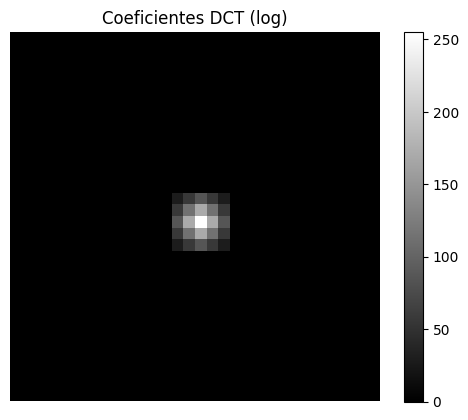

In [5]:
message = read_bin_file('/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/Encoded_reference_image.bin')
print(type(message))
decoded_file = decode_symbols(message, symbols, codes, np.array([32,32]))
plt.imshow(decoded_file, cmap='gray', vmin=0, vmax=np.max(decoded_file))
plt.colorbar()
plt.title('Coeficientes DCT (log)')
plt.axis('off')  # Ocultar ejes
plt.show()